In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Loading & analysing  the data

In [2]:
df = pd.read_csv('Walmart.csv', parse_dates=['Date'])
df

C:\Users\Sahil\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sahil\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sahil\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sahil\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [7]:
df['Holiday_Flag'].unique()

array([0, 1], dtype=int64)

In [14]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


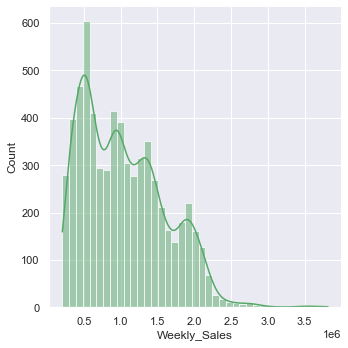

In [9]:
sns.displot(df['Weekly_Sales'], kde = True, color = 'g')

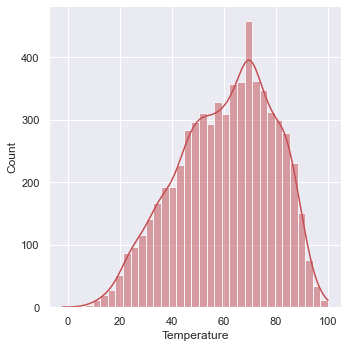

In [10]:
sns.displot(df['Temperature'], kde = True, color = 'r')

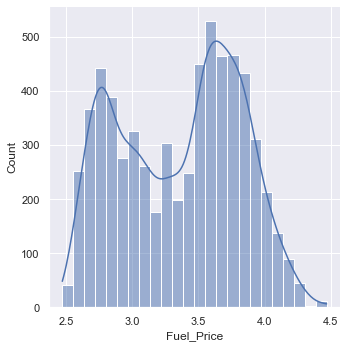

In [11]:
sns.displot(df['Fuel_Price'], kde = True, color = 'b')

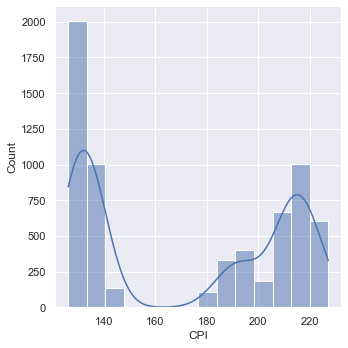

In [13]:
sns.displot(df['CPI'], kde = True)

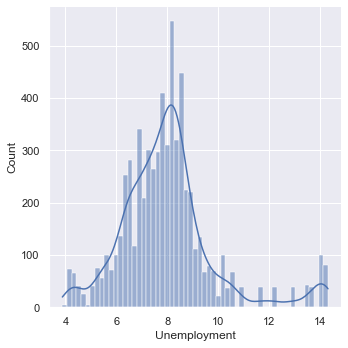

In [15]:
sns.displot(df['Unemployment'], kde = True)

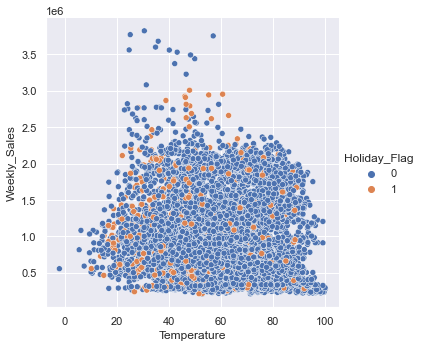

In [23]:
sns.relplot(data = df, x='Temperature', y ='Weekly_Sales', hue='Holiday_Flag')

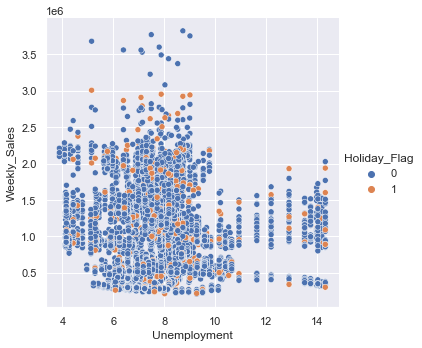

In [21]:
sns.relplot(data = df, x='Unemployment', y ='Weekly_Sales', hue='Holiday_Flag')

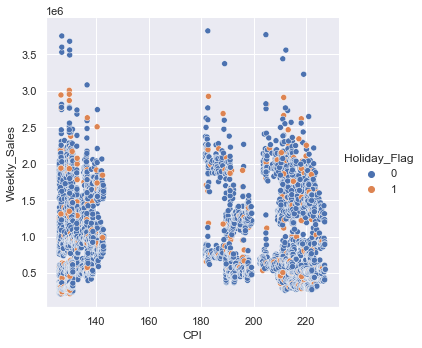

In [24]:
sns.relplot(data = df, x='CPI', y ='Weekly_Sales', hue='Holiday_Flag')

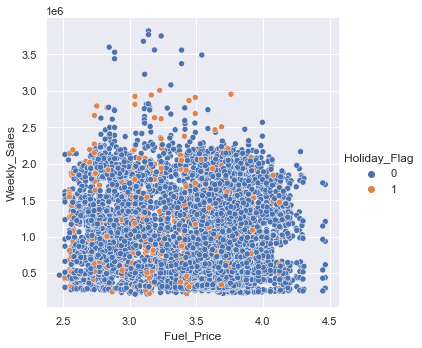

In [25]:
sns.relplot(data = df, x='Fuel_Price', y ='Weekly_Sales', hue='Holiday_Flag')

Looking at the graphs above we cannot conculde anything about the relation between features & weekly sales as most of the values are numerical & continuous

# Preprocessing & analysing the data

In [3]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,18


In [4]:
df['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [38]:
df['Month'].value_counts()

4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: Month, dtype: int64

In [40]:
year_wise_sales = df.groupby('Year')['Weekly_Sales'].sum()
year_wise_sales

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

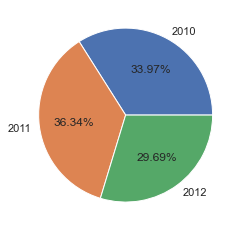

In [43]:
plt.pie(year_wise_sales, labels = df['Year'].unique(), autopct = "%.2f%%")
plt.show()

In [44]:
month_wise_sales = df.groupby('Month')['Weekly_Sales'].sum()
month_wise_sales

Month
1     4.264263e+08
2     5.220257e+08
3     5.534864e+08
4     6.453239e+08
5     6.056966e+08
6     5.750180e+08
7     5.933139e+08
8     5.642317e+08
9     5.905323e+08
10    6.029189e+08
11    4.591693e+08
12    5.990761e+08
Name: Weekly_Sales, dtype: float64

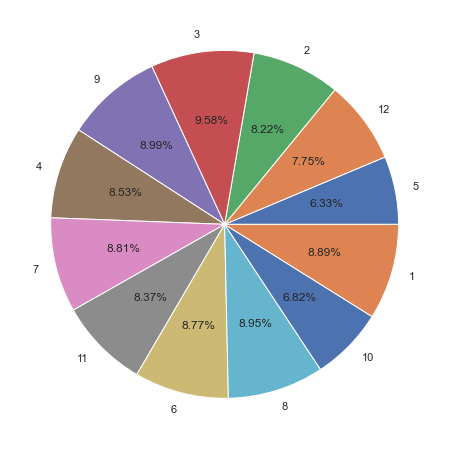

In [47]:
plt.figure(figsize=(10,8))
plt.pie(month_wise_sales, labels = df['Month'].unique(), autopct = "%.2f%%")
plt.show()

In [49]:
holiday_wise_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()
holiday_wise_sales

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

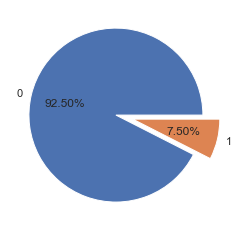

In [54]:
plt.pie(holiday_wise_sales, labels = df['Holiday_Flag'].unique(), autopct = "%.2f%%", explode = [0, 0.2])
plt.show()

In [5]:
#we will drop the date column as it is not needed
df.drop('Date', axis = 1, inplace = True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,17
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,48
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,18


In [6]:
#checking null values
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

We need to convert all categorical columns into dummy variables of values 0 & 1

In [7]:
dummy_store = pd.get_dummies(df['Store'], prefix = 'Store', drop_first = True)
dummy_store.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dummy_year = pd.get_dummies(df['Year'], prefix = 'Year', drop_first = True)
dummy_year.head()

,Year_2011,Year_2012
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [10]:
dummy_month = pd.get_dummies(df['Month'], prefix = 'Month', drop_first = True)
dummy_month.head()

,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [11]:
dummy_day = pd.get_dummies(df['Day'], prefix = 'Day', drop_first = True)
dummy_day.head()

,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
dummy_week = pd.get_dummies(df['WeekOfYear'], prefix = 'Week', drop_first = True)
dummy_week.head()

,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#combining all columns into single dataframe
df2 = pd.concat([df, dummy_store, dummy_year, dummy_month, dummy_day, dummy_week], axis = 1)
df2.shape

(6435, 149)

In [15]:
#drop the columns which are not needed
df2.drop(['Store', 'Year', 'Month', 'Day', 'WeekOfYear'], axis = 1, inplace = True)
df2.shape

(6435, 144)

In [16]:
df2.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X = df2.drop('Weekly_Sales', axis = 1)
Y = df2['Weekly_Sales']
X.shape, Y.shape

((6435, 143), (6435,))

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25, random_state = 100)
Xtrain.shape, Xtest.shape

((4826, 143), (1609, 143))

# Model building

In [19]:
#use linear regression
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
Ypred = lr.predict(Xtest)
print("RMSE: ", mean_squared_error(Ytest, Ypred, squared = False))
print("R2 score: ", r2_score(Ytest, Ypred))

RMSE:  108845.68220603371
R2 score:  0.9622501196067645


As we get accuracy of 96.22% for Linear Regression, I haven't tried other models